import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
!pip install seaborn
import seaborn as sns
%matplotlib inline


In [1]:
import os
import sys
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from sqlalchemy import create_engine, Table, MetaData, select
#import create_engine  
import seaborn as sns 
#%matplotlib inlin

In [2]:
# Be sur to configure PostgreSQL in the API folder
sqlconfig = os.path.join("..","API","PostgreSQL.py")

if not os.path.exists(sqlconfig):
    with open(sqlconfig, 'w') as file:
        file.write("connectionString = ''\nconnectionStringLocal = ''\nuser = ''\npassword = ''\nhost = ''\nport = ''")
    print(f"Configuration file has been created")
else:
    print(f"Configuration file already exists, importing...")

# Import the configuration     
sys.path.insert(1,"../API")
import PostgreSQL

Configuration file already exists, importing...


In [3]:
# Pulling data from PostgreSQL server
engine = create_engine(PostgreSQL.connectionString)
query = 'SELECT * FROM "steam_games"'
data = pd.read_sql_query(query, con = engine)
data.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Linux,Positive,Negative,Achievements,Recommendations,Notes,Developers,Publishers,Categories,Genres
0,1968760,Legend of Rome - The Wrath of Mars,2022-05-05,0 - 20000,2,0,9.99,0,When the Roman people honored a simple warrior...,"['English', 'German']",...,False,0,0,0,0,None,magnussoft,magnussoft,"{Single-player,""Steam Cloud""}",{Casual}
1,434030,Aerofly FS 2 Flight Simulator,2017-11-20,100000 - 200000,19,0,37.49,23,Aerofly FS 2 lets you explore the world of fly...,"['English', 'German', 'French']",...,True,1490,408,0,1831,None,IPACS,IPACS,"{Single-player,""Controller Support""}","{Action,Indie,Racing,Simulation}"
2,262150,Vanguard Princess,2014-03-03,200000 - 500000,1,0,2.49,7,Government experiments on a young girl trigger...,['English'],...,True,2014,841,0,1477,None,Tomoaki Sugeno,eigoMANGA,"{Single-player,Multi-player,PvP,PvP,""Shared/Sp...","{Action,Casual,Indie}"
3,1192900,IRON REBELLION,2021-11-09,50000 - 100000,2,0,11.99,0,WHAT IS IRON REBELLION? Iron Rebellion is all ...,['English'],...,False,168,39,0,186,Iron Rebellion has elements of sci-fi combat w...,Black Beach Studio,Black Beach Studio,"{Multi-player,PvP,PvP,Co-op,Co-op,Cross-Platform}","{Action,Indie,""Early Access""}"
4,231330,Deadfall Adventures,2013-11-15,100000 - 200000,4,0,19.99,0,Deadfall Adventures is an action-driven first-...,"['English', 'German', 'Polish', 'French', 'Rus...",...,True,1716,628,50,1140,None,The Farm 51,THQ Nordic,"{Single-player,Multi-player,Co-op,""Steam Achie...","{Action,Adventure}"


In [4]:

data.shape

(10594, 27)

In [5]:
data.head()


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Linux,Positive,Negative,Achievements,Recommendations,Notes,Developers,Publishers,Categories,Genres
0,1968760,Legend of Rome - The Wrath of Mars,2022-05-05,0 - 20000,2,0,9.99,0,When the Roman people honored a simple warrior...,"['English', 'German']",...,False,0,0,0,0,None,magnussoft,magnussoft,"{Single-player,""Steam Cloud""}",{Casual}
1,434030,Aerofly FS 2 Flight Simulator,2017-11-20,100000 - 200000,19,0,37.49,23,Aerofly FS 2 lets you explore the world of fly...,"['English', 'German', 'French']",...,True,1490,408,0,1831,None,IPACS,IPACS,"{Single-player,""Controller Support""}","{Action,Indie,Racing,Simulation}"
2,262150,Vanguard Princess,2014-03-03,200000 - 500000,1,0,2.49,7,Government experiments on a young girl trigger...,['English'],...,True,2014,841,0,1477,None,Tomoaki Sugeno,eigoMANGA,"{Single-player,Multi-player,PvP,PvP,""Shared/Sp...","{Action,Casual,Indie}"
3,1192900,IRON REBELLION,2021-11-09,50000 - 100000,2,0,11.99,0,WHAT IS IRON REBELLION? Iron Rebellion is all ...,['English'],...,False,168,39,0,186,Iron Rebellion has elements of sci-fi combat w...,Black Beach Studio,Black Beach Studio,"{Multi-player,PvP,PvP,Co-op,Co-op,Cross-Platform}","{Action,Indie,""Early Access""}"
4,231330,Deadfall Adventures,2013-11-15,100000 - 200000,4,0,19.99,0,Deadfall Adventures is an action-driven first-...,"['English', 'German', 'Polish', 'French', 'Rus...",...,True,1716,628,50,1140,None,The Farm 51,THQ Nordic,"{Single-player,Multi-player,Co-op,""Steam Achie...","{Action,Adventure}"


In [8]:
df = data.copy()

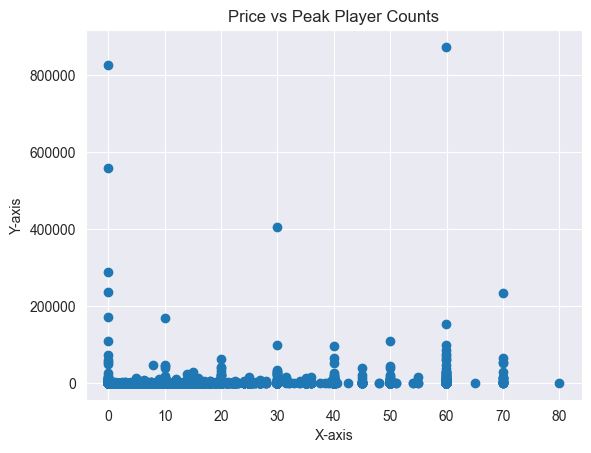

In [9]:

y = df['Peak CCU']
x= df['Price']
plt.title("Price vs Peak Player Counts")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.scatter(x, y)
plt.show()

In [10]:

df['Price'] = df['Price'].astype(int).copy()

print(df.dtypes)

print(df)

AppID                            int64
Name                            object
Release date            datetime64[ns]
Estimated owners                object
Peak CCU                         int64
Required age                     int64
Price                            int32
DLC count                        int64
About the game                  object
Supported languages             object
Full audio languages            object
Reviews                         object
Website                         object
Support url                     object
Support email                   object
Windows                           bool
Mac                               bool
Linux                             bool
Positive                         int64
Negative                         int64
Achievements                     int64
Recommendations                  int64
Notes                           object
Developers                      object
Publishers                      object
Categories               

In [11]:
#top_10 = df['games.csv'].groupby(df('Name')['Peak CCU']).value_count()
#top_10.plot(kind='bar',figsize=(10,8))
#plt.title('Most Popular Game by Peak Player Count')
#plt.show()

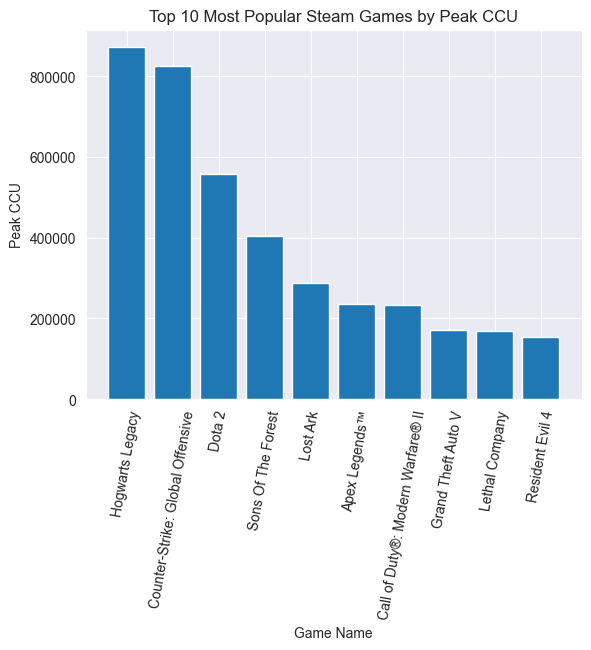

In [12]:
# Sorting games by Peak CCU
top_10 = df.sort_values(by='Peak CCU', ascending=False).head(10).copy()

# Visualizing those with a bar graph
plt.bar(range(len(top_10)), top_10['Peak CCU'])
plt.xticks(range(len(top_10)), top_10['Name'].tolist(), rotation=80)
plt.xlabel('Game Name')
plt.ylabel('Peak CCU')
plt.title('Top 10 Most Popular Steam Games by Peak CCU')
plt.show()

In [13]:
df = data.copy()
fig = px.scatter(
    df, x="Name", color="smoker", facet_col="Peak CCU"
)
fig.show()

NameError: name 'px' is not defined


Name =[{"Name"}]
Price =[{"Name"}]

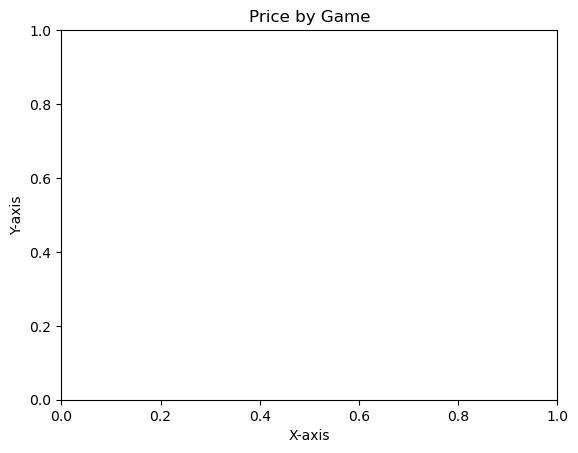

In [13]:
df = data.copy()
x = df['Name']
y = df['Name']
plt.title("Price by Game")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.show()


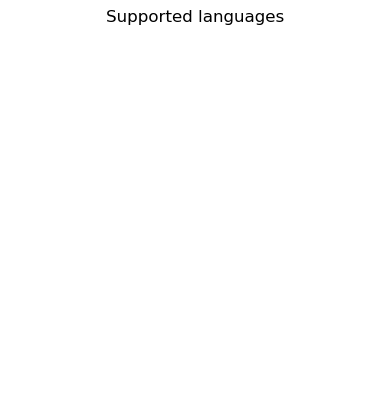

In [15]:
y = np.array([])

plt.title("Supported languages")

plt.pie(y)
plt.show() 